# Classification Buying version 1
Goal, pick when to buy from 'BTCUSDT-hour-target-classification.csv'

In [1]:
# Import all the tools we need

# Regular EDA (exploratory data analysis) and plotting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline # we want our plots to appear inside the notebook

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

## Load data

In [131]:
df = pd.read_csv("data/BTCUSDT-hour-target-classification.csv")
df = df[0:29000]
df = df.dropna()

In [3]:
# df.iloc[28999]

## Skip Data Exploratory, getting benchmark classification score

In [ ]:
# Make a correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots() #figsize=(20, 15)
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")
fig.savefig('corr-matrix.png')

In [170]:
# Split data into X and y
# X = df.drop(["timestamp", "target_new", "target", "open", "high", "low", "close", "ln_close", "close_time"], axis=1)
X = df[["volume_adi", "volume_obv", "volume_nvi", "volatility_atr", "volatility_bbh", "others_cr"]].copy()
y = df["target_new"]

In [171]:
# Split data into train and test sets
np.random.seed(42)

# Split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [172]:
# Put models in a dictonary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models. 
    models : a dict of different Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [173]:
model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

{'Logistic Regression': 0.6763793103448276,
 'KNN': 0.9651724137931035,
 'Random Forest': 0.9843103448275862}

In [174]:
rf = RandomForestClassifier()

In [175]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [176]:
rf.score(X_test, y_test)

0.9843103448275862

In [177]:
a = rf.predict(X_test)

In [178]:
for i in range(10):
    print(f"guess {a[i]} actual {y_test.iloc[i]}")

guess 0 actual 0
guess 0 actual 0
guess 0 actual 0
guess 0 actual 0
guess 1 actual 1
guess 0 actual 0
guess 1 actual 1
guess 0 actual 0
guess 0 actual 0
guess 0 actual 0


In [179]:
feature_dict = dict(zip(X.columns, list(rf.feature_importances_)))
# feature_dict

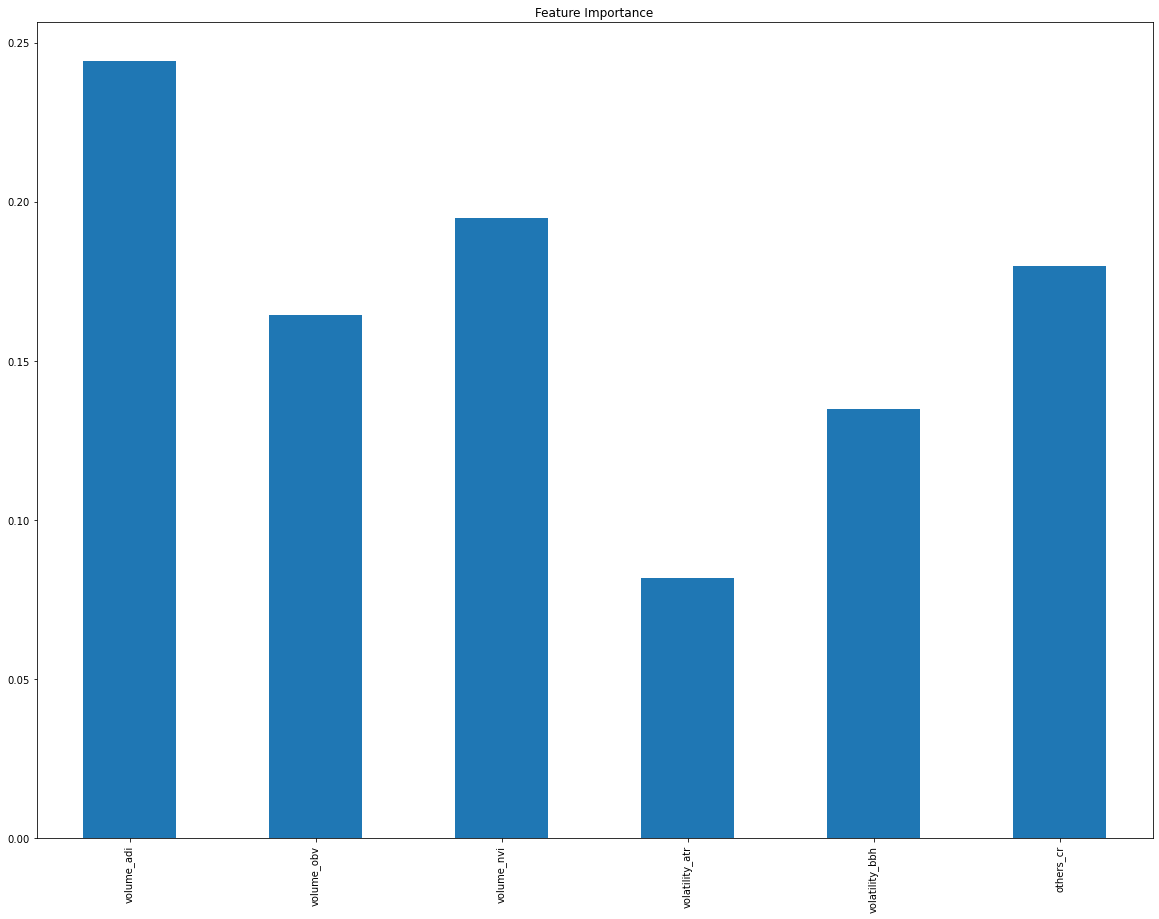

In [180]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False, figsize=(20, 15));

In [189]:
X

,volume_adi,volume_obv,volume_nvi,volatility_atr,volatility_bbh,others_cr
0,4.301206e+02,-74.535483,9.906971e+02,66.264856,4161.991389,-4.971419
1,4.300001e+02,-75.344726,9.906971e+02,59.920370,4163.822520,-5.009016
2,4.311024e+02,-64.601670,9.906971e+02,59.444333,4168.977696,-4.442505
3,4.336960e+02,-67.517221,9.902158e+02,57.121900,4172.191243,-4.488922
4,4.475725e+02,-53.381161,9.902158e+02,58.925710,4173.737557,-3.549920
...,...,...,...,...,...,...
28995,2.798417e+06,186977.990096,1.071883e+06,114.852473,19290.623541,345.783890
28996,2.798883e+06,185618.851195,1.071312e+06,110.367226,19289.578644,345.546239
28997,2.800099e+06,186936.220543,1.076561e+06,110.054503,19288.065886,347.729430
28998,2.800030e+06,184053.848524,1.076561e+06,113.864053,19290.676052,347.294045


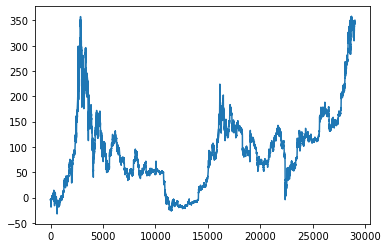

In [195]:
plt.plot(X.others_cr)

In [182]:
# df_test = pd.read_csv("data/BTCUSDT-hour-test-features.csv")

df_test = pd.read_csv("data/BTCUSDT-hour-target-classification.csv")
df_test = df_test.iloc[28000:]
df_test = df_test.round(2)
df_test = df_test.dropna()

In [183]:
df_test

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,...,momentum_roc,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,others_dr,others_dlr,others_cr,target,ln_close,target_new
28000,2020-11-03 08:00:00,13443.30,13555.47,13404.45,13516.43,3720.35,1604393999999,5.022878e+07,48133.0,1988.43,...,-1.08,7.87,4.00,3.87,0.54,0.54,213.69,1469.73,9.51,1
28001,2020-11-03 09:00:00,13516.43,13604.00,13474.28,13561.88,2863.81,1604397599999,3.877823e+07,41438.0,1470.31,...,-0.32,6.87,4.58,2.29,0.34,0.34,214.75,1435.30,9.52,1
28002,2020-11-03 10:00:00,13561.88,13579.32,13493.23,13550.62,2561.23,1604401199999,3.467987e+07,42003.0,1188.99,...,-0.25,5.18,4.70,0.48,-0.08,-0.08,214.48,1458.20,9.51,1
28003,2020-11-03 11:00:00,13550.62,13554.70,13467.96,13532.14,3024.15,1604404799999,4.088338e+07,43161.0,1244.73,...,-0.13,5.06,4.77,0.29,-0.14,-0.14,214.06,1488.13,9.51,1
28004,2020-11-03 12:00:00,13532.15,13550.00,13471.00,13514.68,2174.65,1604408399999,2.937945e+07,37681.0,1129.13,...,-0.10,2.56,4.33,-1.77,-0.13,-0.13,213.65,1517.11,9.51,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32257,2021-04-30 07:00:00,54415.00,54558.80,54250.92,54343.11,2243.09,1619769599999,1.219792e+08,114289.0,1199.52,...,2.81,-0.77,-1.88,1.11,-0.13,-0.13,1161.20,2467.18,10.90,1
32258,2021-04-30 08:00:00,54343.11,54672.31,54108.80,54526.61,1830.73,1619773199999,9.955630e+07,62882.0,922.69,...,2.92,-2.00,-1.90,-0.10,0.34,0.34,1165.46,2299.12,10.91,1
32259,2021-04-30 09:00:00,54526.60,54792.33,54305.00,54318.08,2470.60,1619776799999,1.347759e+08,71415.0,1247.30,...,1.85,-0.58,-1.64,1.06,-0.38,-0.38,1160.62,2528.07,10.90,1
32260,2021-04-30 10:00:00,54317.82,54498.98,54100.00,54164.67,1833.55,1619780399999,9.966568e+07,81975.0,887.68,...,1.46,-1.82,-1.68,-0.14,-0.28,-0.28,1157.06,2705.27,10.90,1


In [184]:
# filtered = df_test.drop(["timestamp", "open", "high", "low", "close", "close_time"], axis=1)
# filtered = df_test.drop(["target_new", "ln_close", "target", "timestamp", "open", "high", "low", "close", "close_time"], axis=1)
filtered = df_test[["volume_adi", "volume_obv", "volume_nvi", "volatility_atr", "volatility_bbh", "others_cr"]].copy()

In [185]:
results = rf.predict(filtered)
# filtered

In [186]:
df_test["results"] = results

In [187]:
test = df_test[:]

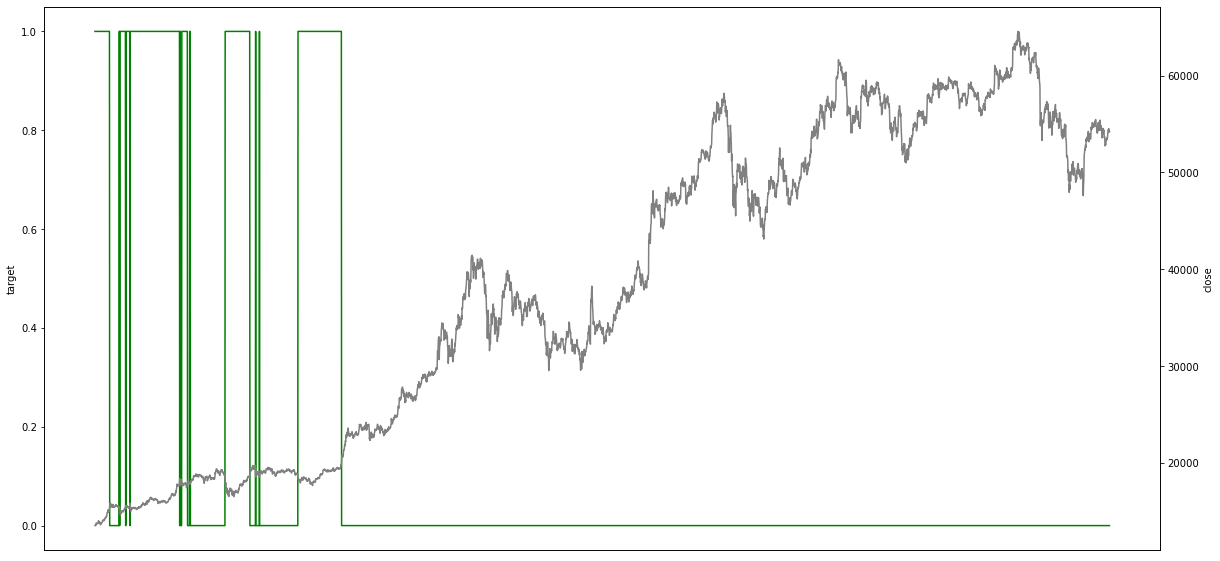

In [188]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(test.timestamp,
         test.results,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("target")

ax.tick_params(labelbottom=False)    
ax.axes.xaxis.set_visible(False)

ax2=ax.twinx()
ax2.plot(test.timestamp,
         test.close,
         color="gray")
ax2.set_ylabel("close")
plt.show()

In [85]:
df_test

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,...,rsi,bb_bbm,bb_bbh,bb_bbl,bb_bbhi,bb_bbli,bb_bbw,bb_bbp,atr,results
0,2021-01-09 08:00:00,39639.21,40254.42,39290.86,40172.14,3081.993289,1610182799999,1.228806e+08,90034.0,1584.085940,...,52.976509,40277.4360,41649.958848,38904.913152,0.0,0.0,6.815344,0.461641,984.488459,0
1,2021-01-09 09:00:00,40167.54,40790.00,40164.03,40348.35,3653.415447,1610186399999,1.479126e+08,104095.0,1909.708821,...,54.288780,40229.2945,41518.413959,38940.175041,0.0,0.0,6.408859,0.546177,958.879998,0
2,2021-01-09 10:00:00,40348.36,40800.00,40105.51,40376.03,3130.356558,1610189999999,1.265966e+08,79151.0,1730.685269,...,54.503567,40175.3895,41339.205570,39011.573430,0.0,0.0,5.793677,0.586199,939.994998,0
3,2021-01-09 11:00:00,40376.03,41237.44,40256.73,40565.77,4682.991247,1610193599999,1.911148e+08,116488.0,2464.970705,...,56.028776,40162.2240,41301.869408,39022.578592,0.0,0.0,5.675211,0.677049,942.903213,0
4,2021-01-09 12:00:00,40565.77,40912.48,40410.01,40874.99,2732.201204,1610197199999,1.111292e+08,70238.0,1257.347035,...,58.472123,40140.8025,41207.619048,39073.985952,0.0,0.0,5.315372,0.844102,911.443697,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2905,2021-05-10 17:00:00,57572.32,57693.44,56849.75,56985.30,4085.398456,1620669599999,2.342138e+08,106825.0,1752.384538,...,40.823732,58236.0860,59603.617448,56868.554552,0.0,0.0,4.696509,0.042685,745.450773,0
2906,2021-05-10 18:00:00,56985.30,57195.32,56388.26,56771.88,4418.643856,1620673199999,2.509665e+08,115203.0,1958.603297,...,39.283799,58178.1640,59683.754815,56672.573185,0.0,0.0,5.175793,0.032979,749.851432,0
2907,2021-05-10 19:00:00,56771.87,56977.48,55516.85,55733.76,6241.027982,1620676799999,3.510041e+08,166920.0,2968.313340,...,32.802112,58052.8100,59896.226862,56209.393138,0.0,1.0,6.350827,-0.129009,800.621330,0
2908,2021-05-10 20:00:00,55733.76,55739.62,53400.00,55240.88,11462.110082,1620680399999,6.289198e+08,326389.0,5613.194201,...,30.250117,57871.9240,60044.212496,55699.635504,0.0,1.0,7.507227,-0.105593,910.549806,0
